Link bài viết gốc trên `GeeksforGeeks`:

https://www.geeksforgeeks.org/understanding-logistic-regression/

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load dataset function
def loadCSV(filename):
    with open(filename, "r") as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        
        for i in range(len(dataset)):
            dataset[i] =[float(x) for x in dataset[i]]
            
    return np.array(dataset)

In [3]:
#function to normalize feature matrix, X
def normalize(X):
    mins = np.min(X)
    maxs = np.max(X)
    rng = maxs - mins
    norm_X = 1 - ((maxs - X)/rng)
    
    return norm_X

**Logistic(Sigmoid) Function**

$$ h(x_i) = g(\beta^Tx_i) = \frac{1}{1 + e^{-\beta^Tx_i}}$$

In [4]:
#logistic(sigmoid) function
def logistic_func(beta, X):
    return 1. / (1. + np.exp(-np.dot(X, beta.T)))

**Logistic Gradient**

$$ LG = h(x^{(i)}) - y^{(i)}$$

In [5]:
#logistic gradient function
def log_gradient(beta, X, y):
    first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1)
    final_calc = np.dot(first_calc.T, X)
    
    return final_calc

**Cost function**

$$ J(\beta) = -\frac{1}{m}\sum^{m}_{i=1}[y_ilog(h(x_i)) + (1 - y_i)log(1 - h(x_i))] $$ 

In [6]:
#cost function
def cost_func(beta, X, y):
    log_func_v = logistic_func(beta, X)
    y = np.squeeze(y)
    
    step1 = y*np.log(log_func_v)
    step2 = (1 - y)*np.log(1 - log_func_v)
    
    final = -(step1 + step2)
    
    return np.mean(final)

**Gradient Descent function**

$$ \frac{\partial J(\beta)}{\partial \beta_j} = (h(x) - y)x_j$$

Repeat{

$$ \beta_j := \beta_j - \alpha\sum^n_{i=1}(h(x_i)-y_i)x_ij$$
(Simultaneously update all $\beta_j$)

}

In [7]:
def grad_desc(X, y, beta, lr = .01, converge_change=.001):
    cost = cost_func(beta, X, y)
    change_cost = 1
    num_iter = 1
    
    while(change_cost > converge_change):
        old_cost = cost
        beta = beta - (lr*log_gradient(beta, X, y))
        cost = cost_func(beta, X, y)
        change_cost = old_cost - cost
        num_iter += 1
        
    return beta, num_iter

In [8]:
#function to predict labels
def pred_values(beta, X):
    pred_prob = logistic_func(beta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    
    return np.squeeze(pred_value)#loai bo cac muc mot chieu

In [9]:
#function to plot decision boundary
def plot_reg(X, y, beta):
    
    #labelled observations
    x_0 = X[np.where(y == 0.0)]
    x_1 = X[np.where(y == 1.0)]
    
    #plotting points with diff color for diff label
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0')
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1')
    
    #plotting decision boundary
    x1 = np.arange(0, 1, 0.1)
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2]
    plt.plot(x1, x2, c='k', label='reg line')
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    
    plt.show()

Estimated regression coefficients:  [[  2.34124157  14.77261481 -21.66598334]]
No. of interations:  2720
correctly predicted labels:  100


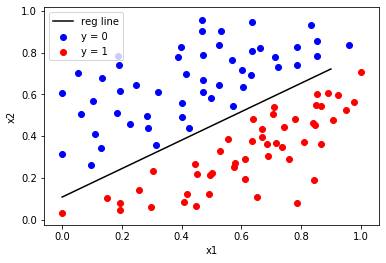

In [10]:
#main function

if __name__ == "__main__":
    #load the dataset
    dataset = loadCSV('data/dataset1.csv')
    
    #normalizing feature matrix
    X = normalize(dataset[:, :-1])
    
    #stacking columns wit all ones in feature matrix
    X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))
    
    #response vector
    y = dataset[:, -1]
    
    #init beta values
    beta = np.matrix(np.zeros(X.shape[1]))
    
    #beta values after running gradient descent
    beta, num_iter = grad_desc(X, y, beta) 
    
    #sestimated beta values and number of interations
    print('Estimated regression coefficients: ', beta)
    print('No. of interations: ', num_iter)
    
    #predicted_labels
    y_pred = pred_values(beta, X)
    
    #number of correctly predicted labels
    print('correctly predicted labels: ', np.sum(y == y_pred))
    
    #plotting regression line
    plot_reg(X, y, beta)